In [1]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm
from training_data import CombinedData
from PIL import Image
from matplotlib import pyplot as plt

data_train = CombinedData('HASY')
data_test = CombinedData('HASY', train=False)

print("Train data length: {0}".format(len(data_train.data)))
print("Test data length: {0}".format(len(data_test.data)))
print("Img Shape: {0}".format(data_train.data[0].shape))
print("Number of Labels: {0}".format(data_train.no_labels))

  0%|          | 0/10000 [00:00<?, ?it/s]

No training data for 0. Skipping
No training data for 1. Skipping
No training data for 2. Skipping
No training data for 3. Skipping
No training data for 4. Skipping
No training data for 5. Skipping
No training data for 6. Skipping
No training data for 7. Skipping
No training data for 8. Skipping
No training data for 9. Skipping
No training data for +. Skipping


100%|██████████| 10000/10000 [00:00<00:00, 155919.76it/s]

No training data for 0. Skipping
No training data for 1. Skipping
No training data for 2. Skipping
No training data for 3. Skipping
No training data for 4. Skipping
No training data for 5. Skipping
No training data for 6. Skipping
No training data for 7. Skipping
No training data for 8. Skipping
No training data for 9. Skipping
No training data for +. Skipping
Train data length: 60405
Test data length: 10045
Img Shape: torch.Size([1, 32, 32])
Number of Labels: 11


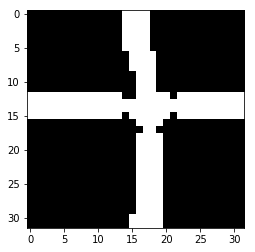

Label: 10


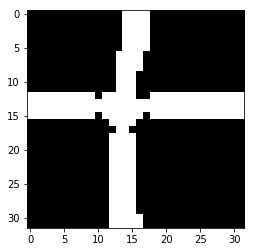

Label: 10


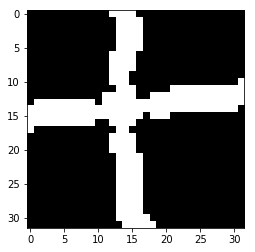

Label: 10


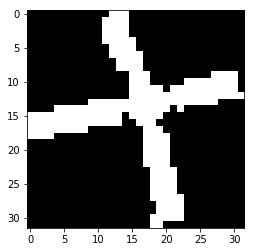

Label: 10


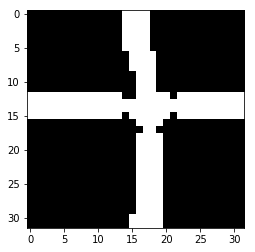

Label: 10


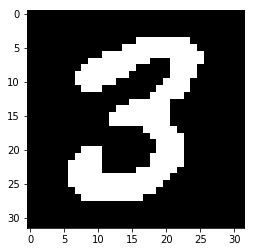

Label: 3


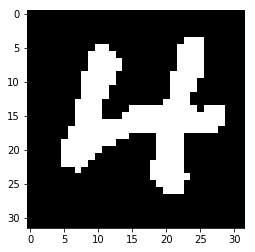

Label: 4


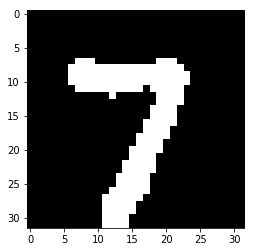

Label: 7


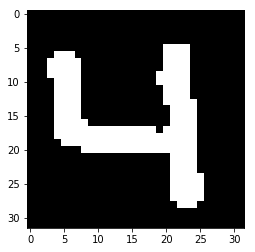

Label: 4


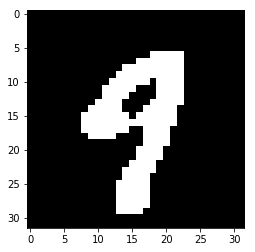

Label: 9


In [2]:
from torchvision import transforms
for i in range(5):
    test_img = transforms.ToPILImage()(data_train.data[i])
    plt.imshow(test_img, cmap='gray')
    plt.show()
    print("Label:", data_train.targets[i])
for i in range(7000, 7005):
    test_img = transforms.ToPILImage()(data_train.data[i])
    plt.imshow(test_img, cmap='gray')
    plt.show()
    print("Label:", data_train.targets[i])

In [4]:
# Train with a pretrained model from PyTorch
from torchvision import models
from torch.nn import Conv2d

pretrained = False
torch_model = models.alexnet(num_classes=15)
torch_model.features[0] = Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
if pretrained:
    torch_model.load_state_dict(torch.load('pretrained-model-01.ckpt'))
epochs = 10
optimizer = torch.optim.Adam(torch_model.parameters(), lr=0.001, betas=(0.95, 0.95), weight_decay=0)
criterion = nn.CrossEntropyLoss()

def calc_accuracy(model):
    accuracies = []
    for idx, [x_test, y_test] in enumerate(tqdm(test_loader)):
        test_pred = model(x_test)
        accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
        accuracies.append(accuracy)
    return np.mean(accuracies)  

train_loader = DataLoader(data_train, batch_size=16, shuffle=True)
test_loader = DataLoader(data_test, batch_size=16, shuffle=False)

print(torch_model)


AlexNet(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3):

In [5]:
for epoch in range(epochs):
    print("Epoch {0}".format(epoch))
    acc = calc_accuracy(torch_model)
    print("Accuracy: {0}".format(acc))
    if acc > 80:
        torch.save(torch_model.state_dict(), 'combined-model-{0}.ckpt'.format(acc))
    for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
        optimizer.zero_grad()
        train_pred = torch_model(x_train)
        loss = criterion(train_pred, y_train)
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            print('Loss: {}'.format(loss))
acc = calc_accuracy(torch_model)
print("Accuracy: {0}".format(acc))
torch.save(torch_model.state_dict(), 'combined-model-v3.ckpt')

  0%|          | 2/677 [00:00<00:39, 17.21it/s]

Epoch 0


  0%|          | 0/4118 [00:00<?, ?it/s]

Accuracy: 7.782496452331543


  0%|          | 1/4118 [00:00<1:00:12,  1.14it/s]

Loss: 2.7008891105651855


  2%|▏         | 101/4118 [01:15<50:02,  1.34it/s]

Loss: 1.9790254831314087


  5%|▍         | 201/4118 [02:29<49:24,  1.32it/s]

Loss: 1.75913405418396


  7%|▋         | 301/4118 [03:49<50:56,  1.25it/s]  

Loss: 1.4406003952026367


 10%|▉         | 401/4118 [04:54<37:43,  1.64it/s]  

Loss: 0.9924538135528564


 12%|█▏        | 501/4118 [05:48<28:49,  2.09it/s]

Loss: 1.1706080436706543


 15%|█▍        | 601/4118 [06:36<26:34,  2.21it/s]

Loss: 0.9471995234489441


 17%|█▋        | 701/4118 [07:25<28:26,  2.00it/s]

Loss: 0.7972868084907532


 19%|█▉        | 801/4118 [08:20<29:01,  1.90it/s]

Loss: 0.2765321731567383


 22%|██▏       | 901/4118 [09:23<31:58,  1.68it/s]

Loss: 0.2392367571592331


 24%|██▍       | 1001/4118 [10:28<34:51,  1.49it/s]

Loss: 0.41073083877563477


 27%|██▋       | 1101/4118 [11:36<34:06,  1.47it/s]

Loss: 0.31951677799224854


 29%|██▉       | 1201/4118 [12:51<40:06,  1.21it/s]

Loss: 0.4666781723499298


 32%|███▏      | 1301/4118 [14:35<1:06:38,  1.42s/it]

Loss: 0.1976892203092575


 34%|███▍      | 1401/4118 [17:43<1:39:21,  2.19s/it]

Loss: 0.31951361894607544


 36%|███▋      | 1501/4118 [21:37<1:45:17,  2.41s/it]

Loss: 0.38629329204559326


 39%|███▉      | 1601/4118 [25:33<1:34:57,  2.26s/it]

Loss: 0.0904008150100708


 41%|████▏     | 1701/4118 [29:05<1:09:48,  1.73s/it]

Loss: 1.0888913869857788


 44%|████▎     | 1801/4118 [31:51<1:05:20,  1.69s/it]

Loss: 1.039750576019287


 46%|████▌     | 1901/4118 [34:37<1:03:05,  1.71s/it]

Loss: 0.11039067804813385


 49%|████▊     | 2001/4118 [37:26<59:14,  1.68s/it]  

Loss: 0.6996229887008667


 51%|█████     | 2101/4118 [40:16<58:47,  1.75s/it]  

Loss: 0.13081881403923035


 53%|█████▎    | 2201/4118 [43:09<54:12,  1.70s/it]

Loss: 0.6221536993980408


 56%|█████▌    | 2301/4118 [46:03<53:19,  1.76s/it]

Loss: 0.5483719110488892


 58%|█████▊    | 2401/4118 [48:52<48:25,  1.69s/it]

Loss: 0.280425488948822


 61%|██████    | 2501/4118 [51:46<47:52,  1.78s/it]

Loss: 0.09299373626708984


 63%|██████▎   | 2601/4118 [54:40<44:56,  1.78s/it]

Loss: 0.8968205451965332


 66%|██████▌   | 2701/4118 [57:38<41:41,  1.77s/it]

Loss: 0.21344801783561707


 68%|██████▊   | 2801/4118 [1:00:32<37:40,  1.72s/it]

Loss: 0.3179194927215576


 70%|███████   | 2901/4118 [1:03:26<34:43,  1.71s/it]

Loss: 0.3346008062362671


 73%|███████▎  | 3001/4118 [1:06:29<37:08,  1.99s/it]

Loss: 0.5059454441070557


 75%|███████▌  | 3101/4118 [1:09:45<32:47,  1.93s/it]

Loss: 0.807022213935852


 78%|███████▊  | 3201/4118 [1:13:04<29:40,  1.94s/it]

Loss: 0.4397236704826355


 80%|████████  | 3301/4118 [1:16:18<26:23,  1.94s/it]

Loss: 0.06370764970779419


 83%|████████▎ | 3401/4118 [1:19:35<23:48,  1.99s/it]

Loss: 0.30852681398391724


 85%|████████▌ | 3501/4118 [1:22:51<17:47,  1.73s/it]

Loss: 0.31425759196281433


 87%|████████▋ | 3601/4118 [1:25:43<15:24,  1.79s/it]

Loss: 0.6578658819198608


 90%|████████▉ | 3701/4118 [1:28:39<11:55,  1.71s/it]

Loss: 0.4771963357925415


 92%|█████████▏| 3801/4118 [1:31:35<09:10,  1.74s/it]

Loss: 0.23802033066749573


 95%|█████████▍| 3901/4118 [1:34:30<06:14,  1.73s/it]

Loss: 0.19922280311584473


 97%|█████████▋| 4001/4118 [1:37:26<03:22,  1.73s/it]

Loss: 0.5133962631225586


100%|█████████▉| 4101/4118 [1:40:21<00:29,  1.72s/it]

Loss: 0.19778750836849213


  0%|          | 3/677 [00:00<00:29, 22.52it/s]

Epoch 1


  0%|          | 0/4118 [00:00<?, ?it/s]

Accuracy: 92.78987884521484


  0%|          | 1/4118 [00:01<2:00:36,  1.76s/it]

Loss: 0.24072802066802979


  2%|▏         | 101/4118 [02:58<1:55:59,  1.73s/it]

Loss: 0.2435332089662552


  5%|▍         | 201/4118 [05:56<1:59:10,  1.83s/it]

Loss: 0.3170923888683319


  7%|▋         | 301/4118 [08:54<1:51:30,  1.75s/it]

Loss: 1.4849684238433838


 10%|▉         | 401/4118 [11:53<1:52:30,  1.82s/it]

Loss: 0.06345020234584808


 12%|█▏        | 501/4118 [14:51<1:45:27,  1.75s/it]

Loss: 0.2863520383834839


 15%|█▍        | 601/4118 [17:48<1:44:29,  1.78s/it]

Loss: 0.055253446102142334


 17%|█▋        | 701/4118 [20:44<1:39:33,  1.75s/it]

Loss: 0.011569082736968994


 19%|█▉        | 801/4118 [23:41<1:36:26,  1.74s/it]

Loss: 0.1903534233570099


 22%|██▏       | 901/4118 [26:38<1:33:34,  1.75s/it]

Loss: 0.9734673500061035


 24%|██▍       | 1001/4118 [29:37<1:31:49,  1.77s/it]

Loss: 0.4849682152271271


 27%|██▋       | 1101/4118 [32:33<1:28:44,  1.76s/it]

Loss: 0.018954545259475708


 29%|██▉       | 1201/4118 [35:32<1:29:15,  1.84s/it]

Loss: 0.019732624292373657


 32%|███▏      | 1301/4118 [38:32<1:23:17,  1.77s/it]

Loss: 0.1445172131061554


 34%|███▍      | 1401/4118 [41:32<1:23:02,  1.83s/it]

Loss: 0.3648343086242676


 36%|███▋      | 1501/4118 [44:29<1:16:30,  1.75s/it]

Loss: 0.3338932394981384


 39%|███▉      | 1601/4118 [47:25<1:13:25,  1.75s/it]

Loss: 0.4461634159088135


 41%|████▏     | 1701/4118 [50:26<1:13:59,  1.84s/it]

Loss: 0.9700947999954224


 44%|████▎     | 1801/4118 [53:25<1:09:50,  1.81s/it]

Loss: 0.6762890815734863


 46%|████▌     | 1901/4118 [56:22<1:04:50,  1.75s/it]

Loss: 0.2790589928627014


 49%|████▊     | 2001/4118 [59:21<1:04:50,  1.84s/it]

Loss: 0.3462241590023041


 51%|█████     | 2101/4118 [1:02:22<59:14,  1.76s/it]  

Loss: 0.13059043884277344


 53%|█████▎    | 2201/4118 [1:05:20<56:19,  1.76s/it]  

Loss: 1.007495403289795


 56%|█████▌    | 2301/4118 [1:08:17<53:04,  1.75s/it]

Loss: 0.04408865422010422


 58%|█████▊    | 2401/4118 [1:11:16<50:36,  1.77s/it]

Loss: 0.15693910419940948


 61%|██████    | 2501/4118 [1:14:16<49:36,  1.84s/it]

Loss: 0.31237199902534485


 63%|██████▎   | 2601/4118 [1:17:12<44:36,  1.76s/it]

Loss: 0.3854026794433594


 66%|██████▌   | 2701/4118 [1:20:11<41:37,  1.76s/it]

Loss: 0.18764543533325195


 68%|██████▊   | 2801/4118 [1:23:12<39:08,  1.78s/it]

Loss: 0.7686087489128113


 70%|███████   | 2901/4118 [1:26:11<35:53,  1.77s/it]

Loss: 1.198436975479126


 73%|███████▎  | 3001/4118 [1:29:11<33:19,  1.79s/it]

Loss: 0.189264714717865


 75%|███████▌  | 3101/4118 [1:32:10<30:01,  1.77s/it]

Loss: 0.06184515357017517


 78%|███████▊  | 3201/4118 [1:35:10<27:37,  1.81s/it]

Loss: 0.5052852630615234


 80%|████████  | 3301/4118 [1:38:11<24:45,  1.82s/it]

Loss: 0.05956672132015228


 83%|████████▎ | 3401/4118 [1:41:14<21:20,  1.79s/it]

Loss: 0.3196181356906891


 85%|████████▌ | 3501/4118 [1:44:13<18:31,  1.80s/it]

Loss: 0.24160820245742798


 87%|████████▋ | 3601/4118 [1:47:15<15:55,  1.85s/it]

Loss: 0.23763933777809143


 90%|████████▉ | 3701/4118 [1:50:17<12:29,  1.80s/it]

Loss: 0.38624319434165955


 92%|█████████▏| 3801/4118 [1:53:17<09:40,  1.83s/it]

Loss: 0.0718303918838501


 95%|█████████▍| 3901/4118 [1:56:22<06:48,  1.88s/it]

Loss: 0.14511768519878387


 97%|█████████▋| 4001/4118 [1:59:43<03:58,  2.04s/it]

Loss: 0.2710428535938263


100%|█████████▉| 4101/4118 [2:03:11<00:35,  2.12s/it]

Loss: 0.04362943768501282


  0%|          | 2/677 [00:00<00:39, 17.17it/s]

Epoch 2


  0%|          | 0/4118 [00:00<?, ?it/s]

Accuracy: 92.31905364990234


  0%|          | 1/4118 [00:02<2:24:01,  2.10s/it]

Loss: 0.06647299230098724


  2%|▏         | 101/4118 [03:28<2:20:59,  2.11s/it]

Loss: 0.3802926242351532


  5%|▍         | 201/4118 [06:32<1:56:14,  1.78s/it]

Loss: 2.4939281940460205


  7%|▋         | 301/4118 [09:33<1:58:36,  1.86s/it]

Loss: 0.5576580166816711


 10%|▉         | 401/4118 [12:34<1:50:52,  1.79s/it]

Loss: 0.021584242582321167


 12%|█▏        | 501/4118 [15:36<1:48:24,  1.80s/it]

Loss: 0.27974969148635864


 15%|█▍        | 601/4118 [18:39<1:49:38,  1.87s/it]

Loss: 0.0006539821624755859


 17%|█▋        | 701/4118 [21:40<1:45:04,  1.85s/it]

Loss: 0.30944427847862244


 19%|█▉        | 801/4118 [24:43<1:38:58,  1.79s/it]

Loss: 0.30722323060035706


 22%|██▏       | 901/4118 [27:49<1:50:59,  2.07s/it]

Loss: 0.22076308727264404


 24%|██▍       | 1001/4118 [31:15<1:46:25,  2.05s/it]

Loss: 0.02165520191192627


 27%|██▋       | 1101/4118 [34:39<1:39:51,  1.99s/it]

Loss: 3.277696132659912


 29%|██▉       | 1201/4118 [37:55<1:26:13,  1.77s/it]

Loss: 0.23125000298023224


 32%|███▏      | 1301/4118 [40:55<1:25:44,  1.83s/it]

Loss: 1.16519296169281


 34%|███▍      | 1401/4118 [43:52<1:19:57,  1.77s/it]

Loss: 2.3444485664367676


 36%|███▋      | 1501/4118 [46:52<1:19:36,  1.83s/it]

Loss: 0.3435242176055908


 39%|███▉      | 1601/4118 [50:05<1:26:02,  2.05s/it]

Loss: 0.6171157956123352


 41%|████▏     | 1701/4118 [53:33<1:20:39,  2.00s/it]

Loss: 0.4417373836040497


 44%|████▎     | 1801/4118 [56:57<1:18:04,  2.02s/it]

Loss: 0.7136837840080261


 46%|████▌     | 1901/4118 [1:00:06<1:05:46,  1.78s/it]

Loss: 2.2592947483062744


 49%|████▊     | 2001/4118 [1:03:05<1:02:43,  1.78s/it]

Loss: 0.2731786072254181


 51%|█████     | 2101/4118 [1:06:04<59:38,  1.77s/it]  

Loss: 0.05849234759807587


 53%|█████▎    | 2201/4118 [1:09:03<56:25,  1.77s/it]  

Loss: 0.24095609784126282


 56%|█████▌    | 2301/4118 [1:12:07<57:08,  1.89s/it]

Loss: 0.45075997710227966


 58%|█████▊    | 2401/4118 [1:15:11<52:08,  1.82s/it]

Loss: 0.08349135518074036


 61%|██████    | 2501/4118 [1:18:14<49:15,  1.83s/it]

Loss: 0.28630638122558594


 63%|██████▎   | 2601/4118 [1:21:13<45:01,  1.78s/it]

Loss: 0.48970827460289


 66%|██████▌   | 2701/4118 [1:24:17<42:38,  1.81s/it]

Loss: 1.6607871055603027


 68%|██████▊   | 2801/4118 [1:27:19<40:58,  1.87s/it]

Loss: 0.041111767292022705


 70%|███████   | 2901/4118 [1:30:22<36:12,  1.79s/it]

Loss: 3.7010834217071533


 73%|███████▎  | 3001/4118 [1:33:23<33:02,  1.78s/it]

Loss: 0.3348398208618164


 75%|███████▌  | 3101/4118 [1:36:25<30:28,  1.80s/it]

Loss: 0.25821053981781006


 78%|███████▊  | 3201/4118 [1:39:26<27:54,  1.83s/it]

Loss: 0.5246033072471619


 80%|████████  | 3301/4118 [1:42:29<24:33,  1.80s/it]

Loss: 0.3407391309738159


 83%|████████▎ | 3401/4118 [1:45:29<21:25,  1.79s/it]

Loss: 0.20905569195747375


 85%|████████▌ | 3501/4118 [1:48:33<19:13,  1.87s/it]

Loss: 0.38459640741348267


 87%|████████▋ | 3601/4118 [1:51:38<15:29,  1.80s/it]

Loss: 0.2247007191181183


 90%|████████▉ | 3701/4118 [1:54:43<12:38,  1.82s/it]

Loss: 0.15717923641204834


 92%|█████████▏| 3801/4118 [1:57:45<09:24,  1.78s/it]

Loss: 0.03611291944980621


 95%|█████████▍| 3901/4118 [2:00:45<06:48,  1.88s/it]

Loss: 0.26676511764526367


 97%|█████████▋| 4001/4118 [2:03:44<03:32,  1.82s/it]

Loss: 0.47542545199394226


100%|█████████▉| 4101/4118 [2:06:45<00:30,  1.80s/it]

Loss: 0.6856477856636047


  0%|          | 3/677 [00:00<00:26, 25.68it/s]

Epoch 3


  0%|          | 0/4118 [00:00<?, ?it/s]

Accuracy: 88.99556732177734


  0%|          | 1/4118 [00:01<2:04:35,  1.82s/it]

Loss: 0.6992366313934326


  2%|▏         | 101/4118 [03:02<2:01:28,  1.81s/it]

Loss: 0.2641386389732361


  5%|▍         | 201/4118 [06:04<1:57:42,  1.80s/it]

Loss: 0.4840027093887329


  7%|▋         | 301/4118 [09:04<1:54:47,  1.80s/it]

Loss: 0.2363533079624176


 10%|▉         | 401/4118 [12:18<2:08:23,  2.07s/it]

Loss: 0.4681691527366638


 12%|█▏        | 501/4118 [15:42<2:02:42,  2.04s/it]

Loss: 0.34619688987731934


 15%|█▍        | 601/4118 [19:07<1:58:47,  2.03s/it]

Loss: 0.21332813799381256


 17%|█▋        | 701/4118 [22:37<2:00:41,  2.12s/it]

Loss: 0.1279592663049698


 19%|█▉        | 801/4118 [25:46<1:42:11,  1.85s/it]

Loss: 0.36293086409568787


 22%|██▏       | 901/4118 [28:48<1:40:34,  1.88s/it]

Loss: 1.2708016633987427


 24%|██▍       | 1001/4118 [31:52<1:35:51,  1.85s/it]

Loss: 0.07420958578586578


 27%|██▋       | 1101/4118 [34:54<1:30:26,  1.80s/it]

Loss: 0.01634007692337036


 29%|██▉       | 1201/4118 [38:16<1:38:03,  2.02s/it]

Loss: 0.3177783489227295


 32%|███▏      | 1301/4118 [41:44<1:44:28,  2.23s/it]

Loss: 1.8980485200881958


 34%|███▍      | 1401/4118 [45:10<1:35:26,  2.11s/it]

Loss: 0.43304312229156494


 36%|███▋      | 1501/4118 [48:37<1:30:25,  2.07s/it]

Loss: 0.5164086818695068


 39%|███▉      | 1601/4118 [52:01<1:25:42,  2.04s/it]

Loss: 0.6720899343490601


 41%|████▏     | 1701/4118 [55:27<1:26:52,  2.16s/it]

Loss: 0.3172774910926819


 44%|████▎     | 1801/4118 [58:52<1:16:40,  1.99s/it]

Loss: 0.8643480539321899


 46%|████▌     | 1901/4118 [1:02:06<1:08:55,  1.87s/it]

Loss: 0.2423655241727829


 49%|████▊     | 2001/4118 [1:05:12<1:05:49,  1.87s/it]

Loss: 0.16783404350280762


 51%|█████     | 2101/4118 [1:08:38<1:07:21,  2.00s/it]

Loss: 0.9092225432395935


 53%|█████▎    | 2201/4118 [1:12:00<1:03:25,  1.98s/it]

Loss: 0.33259230852127075


 56%|█████▌    | 2301/4118 [1:15:25<1:03:51,  2.11s/it]

Loss: 0.16835875809192657


 58%|█████▊    | 2401/4118 [1:18:50<58:35,  2.05s/it]  

Loss: 0.6574110984802246


 61%|██████    | 2501/4118 [1:22:12<54:39,  2.03s/it]

Loss: 0.45043349266052246


 63%|██████▎   | 2601/4118 [1:25:37<51:09,  2.02s/it]

Loss: 0.1753585934638977


 66%|██████▌   | 2701/4118 [1:29:04<49:55,  2.11s/it]

Loss: 0.19867663085460663


 68%|██████▊   | 2801/4118 [1:32:31<44:35,  2.03s/it]

Loss: 0.19128961861133575


 70%|███████   | 2901/4118 [1:35:42<36:25,  1.80s/it]

Loss: 0.16933053731918335


 73%|███████▎  | 3001/4118 [1:38:45<35:10,  1.89s/it]

Loss: 0.9966618418693542


 75%|███████▌  | 3101/4118 [1:41:47<30:59,  1.83s/it]

Loss: 0.05837640166282654


 78%|███████▊  | 3201/4118 [1:44:51<28:15,  1.85s/it]

Loss: 0.5603033304214478


 80%|████████  | 3301/4118 [1:47:52<24:34,  1.81s/it]

Loss: 0.742099404335022


 83%|████████▎ | 3401/4118 [1:50:53<21:24,  1.79s/it]

Loss: 0.8968327045440674


 85%|████████▌ | 3501/4118 [1:53:53<18:29,  1.80s/it]

Loss: 0.1899232119321823


 87%|████████▋ | 3601/4118 [1:57:10<17:33,  2.04s/it]

Loss: 0.07535794377326965


 90%|████████▉ | 3701/4118 [2:00:33<14:03,  2.02s/it]

Loss: 0.5271108150482178


 92%|█████████▏| 3801/4118 [2:04:00<10:37,  2.01s/it]

Loss: 0.4660729765892029


 95%|█████████▍| 3901/4118 [2:07:25<07:35,  2.10s/it]

Loss: 0.4622974395751953


 97%|█████████▋| 4001/4118 [2:10:51<04:07,  2.12s/it]

Loss: 0.029014527797698975


100%|█████████▉| 4101/4118 [2:14:15<00:35,  2.06s/it]

Loss: 0.32331860065460205


  0%|          | 1/677 [00:00<01:13,  9.23it/s]

Epoch 4


  0%|          | 0/4118 [00:00<?, ?it/s]

Accuracy: 85.85671997070312


  0%|          | 1/4118 [00:02<2:17:34,  2.00s/it]

Loss: 0.7785356640815735


  2%|▏         | 101/4118 [03:26<2:16:55,  2.05s/it]

Loss: 0.16071173548698425


  5%|▍         | 201/4118 [06:50<2:13:39,  2.05s/it]

Loss: 0.0031927525997161865


  7%|▋         | 301/4118 [10:15<2:11:02,  2.06s/it]

Loss: 0.130490243434906


 10%|▉         | 401/4118 [13:41<2:05:48,  2.03s/it]

Loss: 0.41986212134361267


 12%|█▏        | 501/4118 [16:57<1:48:59,  1.81s/it]

Loss: 0.0264853835105896


 15%|█▍        | 601/4118 [20:03<1:51:34,  1.90s/it]

Loss: 0.06801760196685791


 17%|█▋        | 701/4118 [23:08<1:46:30,  1.87s/it]

Loss: 0.23208296298980713


 19%|█▉        | 801/4118 [26:25<1:55:20,  2.09s/it]

Loss: 0.4942357540130615


 22%|██▏       | 901/4118 [29:53<1:52:32,  2.10s/it]

Loss: 3.311603546142578


 24%|██▍       | 1001/4118 [33:19<1:47:47,  2.08s/it]

Loss: 0.28924399614334106


 27%|██▋       | 1101/4118 [36:45<1:46:00,  2.11s/it]

Loss: 0.3989076018333435


 29%|██▉       | 1201/4118 [40:14<1:40:13,  2.06s/it]

Loss: 0.6146026253700256


 32%|███▏      | 1301/4118 [43:43<1:39:43,  2.12s/it]

Loss: 0.8852386474609375


 34%|███▍      | 1401/4118 [47:10<1:33:41,  2.07s/it]

Loss: 1.522412896156311


 36%|███▋      | 1501/4118 [50:36<1:27:28,  2.01s/it]

Loss: 0.679894208908081


 39%|███▉      | 1601/4118 [54:02<1:25:00,  2.03s/it]

Loss: 1.067153811454773


 41%|████▏     | 1701/4118 [57:28<1:22:20,  2.04s/it]

Loss: 0.39178773760795593


 44%|████▎     | 1801/4118 [1:00:54<1:21:38,  2.11s/it]

Loss: 0.11310925334692001


 46%|████▌     | 1901/4118 [1:04:21<1:15:17,  2.04s/it]

Loss: 0.08817580342292786


 49%|████▊     | 2001/4118 [1:07:50<1:15:05,  2.13s/it]

Loss: 6.567444801330566


 51%|█████     | 2101/4118 [1:11:13<1:01:30,  1.83s/it]

Loss: 0.3355816602706909


 53%|█████▎    | 2201/4118 [1:14:17<1:04:47,  2.03s/it]

Loss: 0.4073696732521057


 56%|█████▌    | 2301/4118 [1:17:42<1:02:51,  2.08s/it]

Loss: 0.019444674253463745


 58%|█████▊    | 2401/4118 [1:21:09<59:02,  2.06s/it]  

Loss: 0.31071051955223083


 61%|██████    | 2501/4118 [1:24:36<56:12,  2.09s/it]

Loss: 0.7901403903961182


 63%|██████▎   | 2601/4118 [1:27:51<48:21,  1.91s/it]

Loss: 0.522392213344574


 66%|██████▌   | 2701/4118 [1:30:58<47:45,  2.02s/it]

Loss: 0.19406822323799133


 68%|██████▊   | 2801/4118 [1:34:24<46:57,  2.14s/it]

Loss: 0.28640347719192505


 70%|███████   | 2901/4118 [1:37:56<42:13,  2.08s/it]

Loss: 0.5073760151863098


 73%|███████▎  | 3001/4118 [1:41:25<40:18,  2.16s/it]

Loss: 0.4402328133583069


 75%|███████▌  | 3101/4118 [1:44:55<36:28,  2.15s/it]

Loss: 0.3095497190952301


 78%|███████▊  | 3201/4118 [1:48:27<32:56,  2.15s/it]

Loss: 0.021200746297836304


 80%|████████  | 3301/4118 [1:51:57<28:06,  2.06s/it]

Loss: 0.4020828902721405


 83%|████████▎ | 3401/4118 [1:55:24<24:33,  2.05s/it]

Loss: 0.7704203724861145


 85%|████████▌ | 3501/4118 [1:58:51<21:24,  2.08s/it]

Loss: 0.23113544285297394


 87%|████████▋ | 3601/4118 [2:02:18<18:31,  2.15s/it]

Loss: 0.6658624410629272


 90%|████████▉ | 3701/4118 [2:05:45<14:29,  2.09s/it]

Loss: 0.44069841504096985


 92%|█████████▏| 3801/4118 [2:09:10<10:51,  2.05s/it]

Loss: 0.163129061460495


 95%|█████████▍| 3901/4118 [2:12:37<07:45,  2.14s/it]

Loss: 0.31011828780174255


 97%|█████████▋| 4001/4118 [2:16:03<04:02,  2.07s/it]

Loss: 0.556800365447998


100%|█████████▉| 4101/4118 [2:19:27<00:34,  2.04s/it]

Loss: 0.49127835035324097


  0%|          | 2/677 [00:00<00:36, 18.67it/s]

Epoch 5


  0%|          | 0/4118 [00:00<?, ?it/s]

Accuracy: 87.36151885986328


  0%|          | 1/4118 [00:02<2:18:44,  2.02s/it]

Loss: 0.2763804495334625


  2%|▏         | 101/4118 [03:29<2:16:29,  2.04s/it]

Loss: 0.5710034966468811


  5%|▍         | 201/4118 [06:53<2:16:12,  2.09s/it]

Loss: 0.7798435091972351


  7%|▋         | 301/4118 [10:19<2:10:32,  2.05s/it]

Loss: 0.5275295972824097


 10%|▉         | 401/4118 [13:44<2:07:37,  2.06s/it]

Loss: 0.5968762636184692


 12%|█▏        | 501/4118 [17:10<2:05:17,  2.08s/it]

Loss: 0.4292702376842499


 15%|█▍        | 601/4118 [20:37<2:00:25,  2.05s/it]

Loss: 0.2878917455673218


 17%|█▋        | 701/4118 [24:04<1:57:15,  2.06s/it]

Loss: 0.8359805941581726


 19%|█▉        | 801/4118 [27:29<1:53:53,  2.06s/it]

Loss: 0.49308517575263977


 22%|██▏       | 901/4118 [30:56<1:52:01,  2.09s/it]

Loss: 0.5426808595657349


 24%|██▍       | 1001/4118 [34:23<1:47:35,  2.07s/it]

Loss: 1.0555251836776733


 27%|██▋       | 1101/4118 [37:49<1:41:35,  2.02s/it]

Loss: 0.19987115263938904


 29%|██▉       | 1201/4118 [41:16<1:43:29,  2.13s/it]

Loss: 1.5077275037765503


 32%|███▏      | 1301/4118 [44:45<1:35:17,  2.03s/it]

Loss: 0.10807380080223083


 34%|███▍      | 1401/4118 [48:13<1:35:02,  2.10s/it]

Loss: 0.3446907699108124


 36%|███▋      | 1501/4118 [51:39<1:31:56,  2.11s/it]

Loss: 0.13817435503005981


 39%|███▉      | 1601/4118 [55:07<1:27:50,  2.09s/it]

Loss: 0.18997825682163239


 41%|████▏     | 1701/4118 [58:34<1:25:21,  2.12s/it]

Loss: 0.25041404366493225


 44%|████▎     | 1801/4118 [1:02:01<1:20:26,  2.08s/it]

Loss: 0.25824451446533203


 46%|████▌     | 1901/4118 [1:05:28<1:15:13,  2.04s/it]

Loss: 0.29517024755477905


 49%|████▊     | 2001/4118 [1:08:56<1:14:38,  2.12s/it]

Loss: 0.1663600504398346


 51%|█████     | 2101/4118 [1:12:23<1:09:54,  2.08s/it]

Loss: 0.5456277132034302


 53%|█████▎    | 2201/4118 [1:15:51<1:05:49,  2.06s/it]

Loss: 0.22524037957191467


 56%|█████▌    | 2301/4118 [1:19:21<1:03:22,  2.09s/it]

Loss: 0.7315633296966553


 58%|█████▊    | 2401/4118 [1:22:46<58:16,  2.04s/it]  

Loss: 0.00030863285064697266


 61%|██████    | 2501/4118 [1:26:12<55:42,  2.07s/it]

Loss: 0.10632534325122833


 63%|██████▎   | 2601/4118 [1:29:36<46:07,  1.82s/it]

Loss: 0.3742905259132385


 66%|██████▌   | 2701/4118 [1:32:41<42:27,  1.80s/it]

Loss: 0.4012792408466339


 68%|██████▊   | 2801/4118 [1:35:43<41:09,  1.87s/it]

Loss: 0.8543652892112732


 70%|███████   | 2901/4118 [1:38:48<36:26,  1.80s/it]

Loss: 0.6069320440292358


 73%|███████▎  | 3001/4118 [1:41:49<33:38,  1.81s/it]

Loss: 0.4878266155719757


 75%|███████▌  | 3101/4118 [1:44:50<30:38,  1.81s/it]

Loss: 2.220977544784546


 78%|███████▊  | 3201/4118 [1:47:54<27:50,  1.82s/it]

Loss: 0.45358914136886597


 80%|████████  | 3301/4118 [1:51:01<24:47,  1.82s/it]

Loss: 0.17994898557662964


 83%|████████▎ | 3401/4118 [1:54:04<22:29,  1.88s/it]

Loss: 0.09113773703575134


 85%|████████▌ | 3501/4118 [1:57:10<19:32,  1.90s/it]

Loss: 0.6354316473007202


 87%|████████▋ | 3601/4118 [2:00:18<16:07,  1.87s/it]

Loss: 0.26616522669792175


 90%|████████▉ | 3701/4118 [2:03:21<13:00,  1.87s/it]

Loss: 0.384877473115921


 92%|█████████▏| 3801/4118 [2:06:24<09:35,  1.81s/it]

Loss: 0.1414695680141449


 95%|█████████▍| 3901/4118 [2:09:27<06:36,  1.83s/it]

Loss: 0.3604779839515686


 97%|█████████▋| 4001/4118 [2:12:31<03:31,  1.80s/it]

Loss: 1.8417315483093262


100%|█████████▉| 4101/4118 [2:15:37<00:30,  1.79s/it]

Loss: 0.6707445383071899


  0%|          | 3/677 [00:00<00:26, 25.45it/s]

Epoch 6


  0%|          | 0/4118 [00:00<?, ?it/s]

Accuracy: 82.36705780029297


  0%|          | 1/4118 [00:01<2:11:04,  1.91s/it]

Loss: 0.3894122540950775


  2%|▏         | 101/4118 [03:14<2:20:23,  2.10s/it]

Loss: 0.27068740129470825


  5%|▍         | 201/4118 [06:40<2:15:13,  2.07s/it]

Loss: 0.6943566203117371


  7%|▋         | 301/4118 [10:02<2:12:03,  2.08s/it]

Loss: 0.5971781015396118


 10%|▉         | 401/4118 [13:28<2:10:45,  2.11s/it]

Loss: 0.11965116858482361


 12%|█▏        | 501/4118 [16:53<2:03:19,  2.05s/it]

Loss: 0.08042390644550323


 15%|█▍        | 601/4118 [20:05<1:43:52,  1.77s/it]

Loss: 0.3301590383052826


 17%|█▋        | 701/4118 [23:03<1:40:48,  1.77s/it]

Loss: 2.561370849609375


 19%|█▉        | 801/4118 [26:01<1:38:44,  1.79s/it]

Loss: 0.9131049513816833


 22%|██▏       | 901/4118 [29:01<1:34:55,  1.77s/it]

Loss: 0.373428076505661


 24%|██▍       | 1001/4118 [32:01<1:37:36,  1.88s/it]

Loss: 0.6781954765319824


 27%|██▋       | 1101/4118 [35:06<1:29:47,  1.79s/it]

Loss: 0.2950087785720825


 29%|██▉       | 1201/4118 [38:06<1:27:32,  1.80s/it]

Loss: 0.2352214902639389


 32%|███▏      | 1301/4118 [41:07<1:25:48,  1.83s/it]

Loss: 0.37202560901641846


 34%|███▍      | 1401/4118 [44:11<1:22:05,  1.81s/it]

Loss: 0.08734327554702759


 36%|███▋      | 1501/4118 [47:13<1:18:54,  1.81s/it]

Loss: 0.3634779453277588


 39%|███▉      | 1601/4118 [50:15<1:15:47,  1.81s/it]

Loss: 0.22651894390583038


 41%|████▏     | 1701/4118 [53:17<1:13:07,  1.82s/it]

Loss: 0.0135783851146698


 44%|████▎     | 1801/4118 [56:21<1:13:08,  1.89s/it]

Loss: 0.1650111973285675


 46%|████▌     | 1901/4118 [59:32<1:17:37,  2.10s/it]

Loss: 0.8459475636482239


 49%|████▊     | 2001/4118 [1:03:00<1:12:44,  2.06s/it]

Loss: 1.06142258644104


 51%|█████     | 2101/4118 [1:06:28<1:10:23,  2.09s/it]

Loss: 0.07280677556991577


 53%|█████▎    | 2201/4118 [1:09:54<1:04:54,  2.03s/it]

Loss: 0.4077328145503998


 56%|█████▌    | 2301/4118 [1:13:20<1:02:05,  2.05s/it]

Loss: 0.23145148158073425


 58%|█████▊    | 2401/4118 [1:16:45<59:23,  2.08s/it]  

Loss: 0.23620152473449707


 61%|██████    | 2501/4118 [1:20:09<54:36,  2.03s/it]  

Loss: 1.9059313535690308


 63%|██████▎   | 2601/4118 [1:23:37<52:14,  2.07s/it]

Loss: 0.6086041331291199


 66%|██████▌   | 2701/4118 [1:27:03<47:52,  2.03s/it]

Loss: 0.5336249470710754


 68%|██████▊   | 2801/4118 [1:30:30<45:31,  2.07s/it]

Loss: 0.2569943070411682


 70%|███████   | 2901/4118 [1:33:52<38:02,  1.88s/it]

Loss: 0.053861647844314575


 73%|███████▎  | 3001/4118 [1:36:54<33:22,  1.79s/it]

Loss: 0.3589693307876587


 75%|███████▌  | 3101/4118 [1:39:55<30:28,  1.80s/it]

Loss: 0.3648507595062256


 78%|███████▊  | 3201/4118 [1:43:17<30:34,  2.00s/it]

Loss: 0.6161158084869385


 80%|████████  | 3301/4118 [1:46:45<27:58,  2.05s/it]

Loss: 0.10553866624832153


 83%|████████▎ | 3401/4118 [1:50:09<25:37,  2.14s/it]

Loss: 0.5439508557319641


 85%|████████▌ | 3501/4118 [1:53:35<20:40,  2.01s/it]

Loss: 0.5149021148681641


 87%|████████▋ | 3601/4118 [1:57:00<17:43,  2.06s/it]

Loss: 0.4069612920284271


 90%|████████▉ | 3701/4118 [2:00:16<12:31,  1.80s/it]

Loss: 0.6626551151275635


 92%|█████████▏| 3801/4118 [2:03:16<09:31,  1.80s/it]

Loss: 0.7381448149681091


 95%|█████████▍| 3901/4118 [2:06:20<06:49,  1.89s/it]

Loss: 0.030567288398742676


 97%|█████████▋| 4001/4118 [2:09:24<03:38,  1.87s/it]

Loss: 0.01493602991104126


100%|█████████▉| 4101/4118 [2:12:30<00:31,  1.84s/it]

Loss: 0.6896445751190186


  0%|          | 3/677 [00:00<00:26, 25.01it/s]

Epoch 7


  0%|          | 0/4118 [00:00<?, ?it/s]

Accuracy: 88.0262222290039


  0%|          | 1/4118 [00:01<2:04:53,  1.82s/it]

Loss: 0.35792863368988037


  2%|▏         | 101/4118 [03:01<2:00:42,  1.80s/it]

Loss: 0.14154310524463654


  5%|▍         | 201/4118 [06:05<2:03:59,  1.90s/it]

Loss: 1.000851035118103


  7%|▋         | 301/4118 [09:06<1:54:06,  1.79s/it]

Loss: 0.40817591547966003


 10%|▉         | 401/4118 [12:06<1:52:41,  1.82s/it]

Loss: 0.02999436855316162


 12%|█▏        | 501/4118 [15:10<1:48:00,  1.79s/it]

Loss: 0.28103190660476685


 15%|█▍        | 601/4118 [18:12<1:45:59,  1.81s/it]

Loss: 0.5654296875


 17%|█▋        | 701/4118 [22:07<2:38:30,  2.78s/it]

Loss: 0.372870534658432


 19%|█▉        | 801/4118 [26:43<2:33:52,  2.78s/it]

Loss: 0.5615909695625305


 22%|██▏       | 901/4118 [31:21<2:33:17,  2.86s/it]

Loss: 0.3337183892726898


 24%|██▍       | 1001/4118 [34:57<1:45:48,  2.04s/it]

Loss: 0.36486491560935974


 27%|██▋       | 1101/4118 [38:28<1:45:48,  2.10s/it]

Loss: 0.3163491189479828


 29%|██▉       | 1201/4118 [41:54<1:41:29,  2.09s/it]

Loss: 0.08024093508720398


 32%|███▏      | 1301/4118 [45:01<1:24:19,  1.80s/it]

Loss: 0.1810070276260376


 34%|███▍      | 1401/4118 [48:03<1:21:39,  1.80s/it]

Loss: 0.3249911665916443


 36%|███▋      | 1501/4118 [51:04<1:20:01,  1.83s/it]

Loss: 0.5489013195037842


 39%|███▉      | 1601/4118 [54:04<1:15:40,  1.80s/it]

Loss: 0.16976600885391235


 41%|████▏     | 1701/4118 [57:07<1:13:13,  1.82s/it]

Loss: 0.2294325977563858


 44%|████▎     | 1801/4118 [1:00:15<1:10:48,  1.83s/it]

Loss: 0.06268608570098877


 46%|████▌     | 1901/4118 [1:03:20<1:09:18,  1.88s/it]

Loss: 0.4147930145263672


 49%|████▊     | 2001/4118 [1:06:23<1:03:44,  1.81s/it]

Loss: 0.513425350189209


 51%|█████     | 2101/4118 [1:09:26<1:03:36,  1.89s/it]

Loss: 0.5540646910667419


 53%|█████▎    | 2201/4118 [1:12:33<57:40,  1.81s/it]  

Loss: 0.4099142551422119


 56%|█████▌    | 2301/4118 [1:15:39<54:55,  1.81s/it]

Loss: 0.5846852660179138


 58%|█████▊    | 2401/4118 [1:18:43<52:02,  1.82s/it]

Loss: 0.15488995611667633


 61%|██████    | 2501/4118 [1:22:03<56:05,  2.08s/it]

Loss: 1.1483174562454224


 63%|██████▎   | 2601/4118 [1:25:32<51:23,  2.03s/it]

Loss: 0.5679070949554443


 66%|██████▌   | 2701/4118 [1:29:02<49:20,  2.09s/it]

Loss: 0.0358300507068634


 68%|██████▊   | 2801/4118 [1:32:31<45:44,  2.08s/it]

Loss: 0.4727246165275574


 70%|███████   | 2901/4118 [1:35:57<41:46,  2.06s/it]

Loss: 0.13045936822891235


 73%|███████▎  | 3001/4118 [1:39:26<38:55,  2.09s/it]

Loss: 0.4785389006137848


 75%|███████▌  | 3101/4118 [1:42:54<34:19,  2.03s/it]

Loss: 0.8693568110466003


 78%|███████▊  | 3201/4118 [1:46:23<32:16,  2.11s/it]

Loss: 0.35848498344421387


 80%|████████  | 3301/4118 [1:49:53<28:10,  2.07s/it]

Loss: 0.31448060274124146


 83%|████████▎ | 3401/4118 [1:53:20<24:46,  2.07s/it]

Loss: 0.6089834570884705


 85%|████████▌ | 3501/4118 [1:56:48<21:38,  2.11s/it]

Loss: 0.5575315356254578


 87%|████████▋ | 3601/4118 [2:00:18<17:59,  2.09s/it]

Loss: 0.5353569388389587


 90%|████████▉ | 3701/4118 [2:03:45<14:34,  2.10s/it]

Loss: 0.18948222696781158


 92%|█████████▏| 3801/4118 [2:07:12<10:45,  2.04s/it]

Loss: 0.8094995021820068


 95%|█████████▍| 3901/4118 [2:10:41<07:28,  2.07s/it]

Loss: 0.2578754425048828


 97%|█████████▋| 4001/4118 [2:14:09<04:11,  2.15s/it]

Loss: 1.0541770458221436


100%|█████████▉| 4101/4118 [2:17:35<00:34,  2.04s/it]

Loss: 0.21515822410583496


  0%|          | 1/677 [00:00<01:12,  9.36it/s]

Epoch 8


  0%|          | 0/4118 [00:00<?, ?it/s]

Accuracy: 87.66617584228516


  0%|          | 1/4118 [00:02<2:20:07,  2.04s/it]

Loss: 0.4448375701904297


  2%|▏         | 101/4118 [03:28<2:17:25,  2.05s/it]

Loss: 0.043593719601631165


  5%|▍         | 201/4118 [06:53<2:19:31,  2.14s/it]

Loss: 1.6846513748168945


  7%|▋         | 301/4118 [10:19<2:08:03,  2.01s/it]

Loss: 0.8689004778862


 10%|▉         | 401/4118 [13:49<2:14:50,  2.18s/it]

Loss: 3.9349238872528076


 12%|█▏        | 501/4118 [17:18<2:08:18,  2.13s/it]

Loss: 0.28718316555023193


 15%|█▍        | 601/4118 [20:48<2:03:54,  2.11s/it]

Loss: 0.21477264165878296


 17%|█▋        | 701/4118 [24:14<1:57:20,  2.06s/it]

Loss: 0.29491204023361206


 19%|█▉        | 801/4118 [27:41<1:51:47,  2.02s/it]

Loss: 0.3460928201675415


 22%|██▏       | 901/4118 [31:09<1:49:15,  2.04s/it]

Loss: 0.12006458640098572


 24%|██▍       | 1001/4118 [34:37<1:49:17,  2.10s/it]

Loss: 0.9072218537330627


 27%|██▋       | 1101/4118 [38:08<1:47:33,  2.14s/it]

Loss: 0.14404235780239105


 29%|██▉       | 1201/4118 [41:37<1:37:45,  2.01s/it]

Loss: 0.1046857237815857


 32%|███▏      | 1301/4118 [45:08<1:39:54,  2.13s/it]

Loss: 1.476461410522461


 34%|███▍      | 1401/4118 [48:40<1:38:03,  2.17s/it]

Loss: 0.8091238737106323


 36%|███▋      | 1501/4118 [51:57<1:19:19,  1.82s/it]

Loss: 0.3225439190864563


 39%|███▉      | 1601/4118 [54:59<1:16:47,  1.83s/it]

Loss: 0.5291124582290649


 41%|████▏     | 1701/4118 [58:04<1:14:29,  1.85s/it]

Loss: 0.5275139212608337


 44%|████▎     | 1801/4118 [1:01:09<1:09:54,  1.81s/it]

Loss: 5.117007732391357


 46%|████▌     | 1901/4118 [1:04:11<1:07:23,  1.82s/it]

Loss: 0.9837854504585266


 49%|████▊     | 2001/4118 [1:07:15<1:03:54,  1.81s/it]

Loss: 0.01300954818725586


 51%|█████     | 2101/4118 [1:10:20<1:04:01,  1.90s/it]

Loss: 0.15984588861465454


 53%|█████▎    | 2201/4118 [1:13:28<58:53,  1.84s/it]  

Loss: 0.37648805975914


 56%|█████▌    | 2301/4118 [1:16:32<57:00,  1.88s/it]

Loss: 0.40029385685920715


 58%|█████▊    | 2401/4118 [1:19:36<54:50,  1.92s/it]

Loss: 0.37130990624427795


 61%|██████    | 2501/4118 [1:22:41<50:56,  1.89s/it]

Loss: 0.48670056462287903


 63%|██████▎   | 2601/4118 [1:25:44<45:57,  1.82s/it]

Loss: 1.6650819778442383


 66%|██████▌   | 2701/4118 [1:28:48<42:44,  1.81s/it]

Loss: 0.2423686683177948


 68%|██████▊   | 2801/4118 [1:31:54<39:48,  1.81s/it]

Loss: 0.6145673394203186


 70%|███████   | 2901/4118 [1:34:59<38:29,  1.90s/it]

Loss: 5.698204040527344e-05


 73%|███████▎  | 3001/4118 [1:38:03<33:36,  1.81s/it]

Loss: 0.2123229205608368


 75%|███████▌  | 3101/4118 [1:41:09<31:01,  1.83s/it]

Loss: 0.16223403811454773


 78%|███████▊  | 3201/4118 [1:44:16<27:47,  1.82s/it]

Loss: 1.7240443229675293


 80%|████████  | 3301/4118 [1:47:17<25:04,  1.84s/it]

Loss: 0.4891207218170166


 83%|████████▎ | 3401/4118 [1:50:20<21:36,  1.81s/it]

Loss: 0.3644382655620575


 85%|████████▌ | 3501/4118 [1:53:24<18:31,  1.80s/it]

Loss: 0.4409838616847992


 87%|████████▋ | 3601/4118 [1:56:27<15:29,  1.80s/it]

Loss: 0.045722782611846924


 90%|████████▉ | 3701/4118 [1:59:32<12:59,  1.87s/it]

Loss: 0.15440776944160461


 92%|█████████▏| 3801/4118 [2:02:38<09:27,  1.79s/it]

Loss: 0.0801023542881012


 95%|█████████▍| 3901/4118 [2:05:41<06:30,  1.80s/it]

Loss: 0.11941970884799957


 97%|█████████▋| 4001/4118 [2:08:46<03:35,  1.84s/it]

Loss: 0.5488650798797607


100%|█████████▉| 4101/4118 [2:11:49<00:30,  1.79s/it]

Loss: 0.21771100163459778


  0%|          | 3/677 [00:00<00:29, 22.56it/s]

Epoch 9


  0%|          | 0/4118 [00:00<?, ?it/s]

Accuracy: 87.48153686523438


  0%|          | 1/4118 [00:01<2:06:02,  1.84s/it]

Loss: 0.2082163542509079


  2%|▏         | 101/4118 [03:06<2:02:10,  1.82s/it]

Loss: 0.6997914910316467


  5%|▍         | 201/4118 [06:07<1:57:51,  1.81s/it]

Loss: 3.5397510528564453


  7%|▋         | 301/4118 [09:07<1:53:12,  1.78s/it]

Loss: 0.15989848971366882


 10%|▉         | 401/4118 [12:06<1:51:00,  1.79s/it]

Loss: 0.7013123631477356


 12%|█▏        | 501/4118 [15:06<1:50:28,  1.83s/it]

Loss: 0.5061825513839722


 15%|█▍        | 601/4118 [18:11<1:46:33,  1.82s/it]

Loss: 0.7617427110671997


 17%|█▋        | 701/4118 [21:14<1:41:22,  1.78s/it]

Loss: 1.118821620941162


 19%|█▉        | 801/4118 [24:17<1:38:26,  1.78s/it]

Loss: 0.22373570501804352


 22%|██▏       | 901/4118 [27:19<1:41:03,  1.88s/it]

Loss: 0.5098469257354736


 24%|██▍       | 1001/4118 [30:22<1:37:32,  1.88s/it]

Loss: 0.5021991729736328


 27%|██▋       | 1101/4118 [33:26<1:35:12,  1.89s/it]

Loss: 0.4185212254524231


 29%|██▉       | 1201/4118 [36:29<1:28:33,  1.82s/it]

Loss: 0.2472817301750183


 32%|███▏      | 1301/4118 [39:32<1:28:05,  1.88s/it]

Loss: 0.16084648668766022


 34%|███▍      | 1401/4118 [42:34<1:22:21,  1.82s/it]

Loss: 0.3580169677734375


 36%|███▋      | 1501/4118 [45:36<1:18:12,  1.79s/it]

Loss: 0.4230761229991913


 39%|███▉      | 1601/4118 [48:37<1:19:18,  1.89s/it]

Loss: 1.0871975421905518


 41%|████▏     | 1701/4118 [51:42<1:14:35,  1.85s/it]

Loss: 1.9264636039733887


 44%|████▎     | 1801/4118 [54:46<1:13:01,  1.89s/it]

Loss: 0.14785456657409668


 46%|████▌     | 1901/4118 [57:54<1:07:26,  1.83s/it]

Loss: 0.08679743111133575


 49%|████▊     | 2001/4118 [1:01:02<1:06:56,  1.90s/it]

Loss: 0.1341577023267746


 51%|█████     | 2101/4118 [1:04:07<1:01:50,  1.84s/it]

Loss: 0.4319222569465637


 53%|█████▎    | 2201/4118 [1:07:13<57:49,  1.81s/it]  

Loss: 0.8946848511695862


 56%|█████▌    | 2301/4118 [1:10:15<57:07,  1.89s/it]

Loss: 0.48535165190696716


 58%|█████▊    | 2401/4118 [1:13:22<52:06,  1.82s/it]

Loss: 0.35185182094573975


 61%|██████    | 2501/4118 [1:16:25<48:53,  1.81s/it]

Loss: 0.19899436831474304


 63%|██████▎   | 2601/4118 [1:19:31<46:50,  1.85s/it]

Loss: 1.0907020568847656


 66%|██████▌   | 2701/4118 [1:22:32<44:19,  1.88s/it]

Loss: 0.43429309129714966


 68%|██████▊   | 2801/4118 [1:25:33<39:33,  1.80s/it]

Loss: 0.10186806321144104


 70%|███████   | 2901/4118 [1:28:36<36:39,  1.81s/it]

Loss: 0.17084592580795288


 73%|███████▎  | 3001/4118 [1:31:39<34:50,  1.87s/it]

Loss: 0.20708122849464417


 75%|███████▌  | 3101/4118 [1:34:43<30:24,  1.79s/it]

Loss: 0.3248206377029419


 78%|███████▊  | 3201/4118 [1:37:45<27:55,  1.83s/it]

Loss: 1.2201178073883057


 80%|████████  | 3301/4118 [1:40:48<24:17,  1.78s/it]

Loss: 0.35525256395339966


 83%|████████▎ | 3401/4118 [1:43:49<21:40,  1.81s/it]

Loss: 0.4591207802295685


 85%|████████▌ | 3501/4118 [1:46:52<18:25,  1.79s/it]

Loss: 0.1559588760137558


 87%|████████▋ | 3601/4118 [1:49:53<15:21,  1.78s/it]

Loss: 0.8081021308898926


 90%|████████▉ | 3701/4118 [1:52:54<12:30,  1.80s/it]

Loss: 0.21592774987220764


 92%|█████████▏| 3801/4118 [1:55:55<09:23,  1.78s/it]

Loss: 0.8112756609916687


 95%|█████████▍| 3901/4118 [1:58:54<06:26,  1.78s/it]

Loss: 0.8737660646438599


 97%|█████████▋| 4001/4118 [2:01:53<03:33,  1.83s/it]

Loss: 0.4172935485839844


100%|█████████▉| 4101/4118 [2:04:54<00:30,  1.78s/it]

Loss: 0.5871964693069458


100%|██████████| 677/677 [00:28<00:00, 23.70it/s]


Accuracy: 86.20753479003906
